In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

<Figure size 1000x600 with 0 Axes>

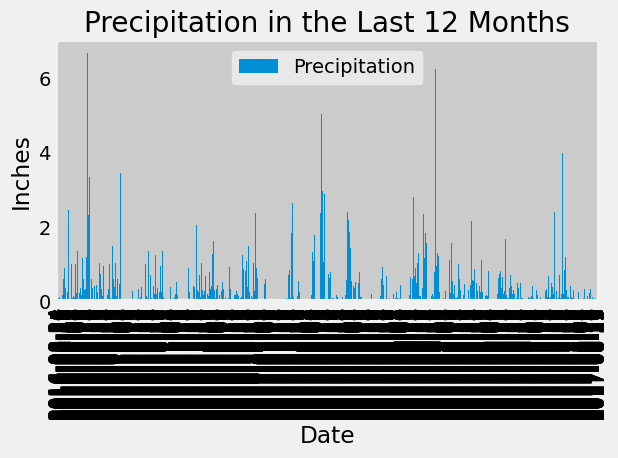

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. most_active_station = session.query(Measurement.station, func.count(Measurement.station))\
dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
query_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
recent_prcp = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= query_date)\
    .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(recent_prcp, columns=['Date', 'Precipitation'])
df = df.dropna(how="any")
# Sort the dataframe by date
df = df.sort_values("Date")


# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
df.plot(kind='bar', width=3)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation in the Last 12 Months")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()



In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).group_by(Station.station).count()

9

In [62]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281')\
    .all()

[(54.0, 85.0, 71.66378066378067)]

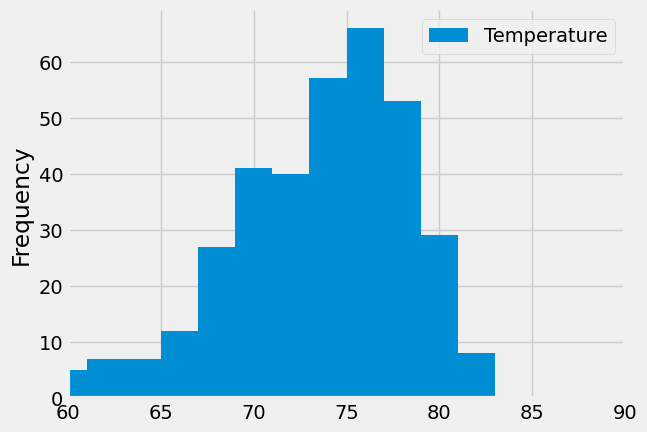

<Figure size 640x480 with 0 Axes>

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
reatest = session.query(Measurement.tobs, Measurement.date)\
    .filter(Measurement.date >= dt.date(2016, 8, 23))\
    .filter(Measurement.station == 'USC00519281')\
    .all()

greatest_df = pd.DataFrame(greatest, columns=["Temperature", "Date"])
greatest_df.plot.hist(column='Temperature', bins=12)
plt.xlim(60, 90)
plt.show()
plt.tight_layout()

# Close Session

In [65]:
# Close Session
session.close()